In [ ]:
step
0. describe, info
1.결측지
2. 이상치
3. 상관관계 sns.heatmap(df.corr())
4. 종속변수 간 변수관계 (.unstack, plotbar(stacked=True)) 달별 여행기간 
6.파생변수 생성 
7. random_state 고정
8. 범주형 변수 처리
9. 데이터 스케일링 minmaxscaler
10.그리드 서치 나 인자 변경
11.교차분석
12.회귀분석모델 정리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='./drive/MyDrive/data/'
train_filename='train_Texi_Trip.csv'  

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv(os.path.join(file_path, train_filename))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## 종속변수 값

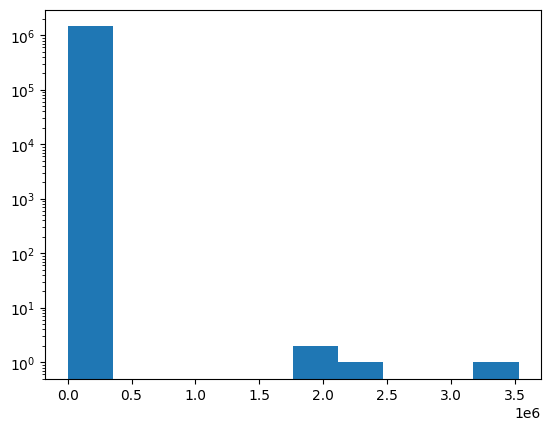

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train['trip_duration'],) #value_counts() 로 도수분포표 넣는거 아님.
plt.yscale('log')

## 수치형 변수와 종속변수 간 관계

In [ ]:
obj_list = []
for col, type in zip(train.columns, train.dtypes) :
  if type == "object" :
    obj_list.append(col)

In [ ]:
b = train.columns.tolist()
for obj in obj_list :
  b.remove(obj)

<Axes: >

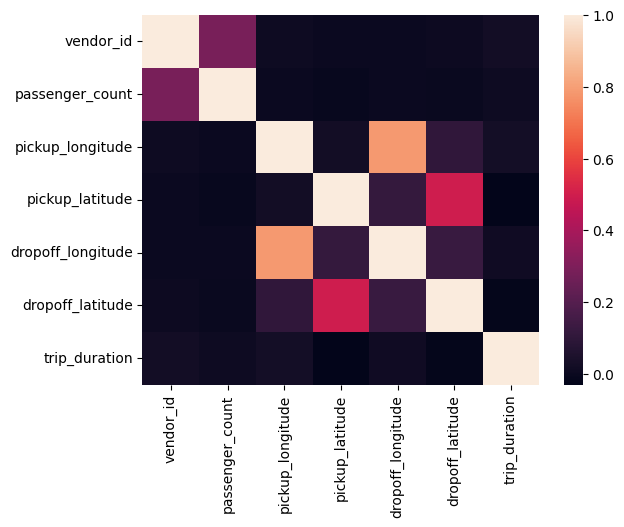

In [ ]:
import seaborn as sns
sns.heatmap(train[b].corr()) # heatmap은 범주형 변수는 제외하고 진행해야함
# trip_duration Target 컬럼 기준으로 상관관계를 보면 모든 변수가 큰 상관관계가 없다고 판단할 수 있다. 


## 범주형변수와 종속변수간의 관계

In [ ]:
train.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

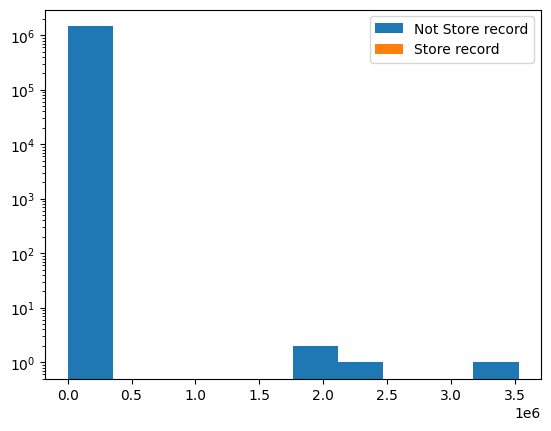

In [ ]:
# ### 연령별 생존율 히스토그램 # how_to?
plt.hist(x = [train.trip_duration[train["store_and_fwd_flag"]== 'N'], train.trip_duration[train["store_and_fwd_flag"]=='Y']], histtype = "barstacked", label = ["Not Store record","Store record"])# 
plt.legend()
# plt.ylim(0, 1000)
plt.yscale('log')

## 파생변수 생성
- 경도 위도 이용한 가장 짧은 거리 # 수치형 -> 뭉쳐있는 경우 범주형
- 탑승 하차시간 이용한 시간변수 #범주형
- 

1) 시간

In [ ]:
train['dropoff_datetime'] =  pd.to_datetime(train['dropoff_datetime'])

In [ ]:
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'])

In [ ]:
train['month'] = train['pickup_datetime'].map(lambda x : x.month)
train['day'] = train['pickup_datetime'].map(lambda x : x.day)
# train['weekday'] = train['pickup_datetime'].map(lambda x : x.weekday)
train['hour'] = train['pickup_datetime'].map(lambda x : x.hour)
train['minute'] = train['pickup_datetime'].map(lambda x : x.minute)

In [ ]:
train['take_time'] = (train['dropoff_datetime'])-(train['pickup_datetime'])# target 구하는 

In [ ]:
train['take_time'] = train.take_time.apply(lambda x : x.seconds) # Timestemp는 days, seconds를 구할수 있다고 함.

In [ ]:
duration_by_month=[train.trip_duration[train['month']==1], train.trip_duration[train['month']==2],train.trip_duration[train['month']==3],train.trip_duration[train['month']==4],train.trip_duration[train['month']==5],train.trip_duration[train['month']==6]]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


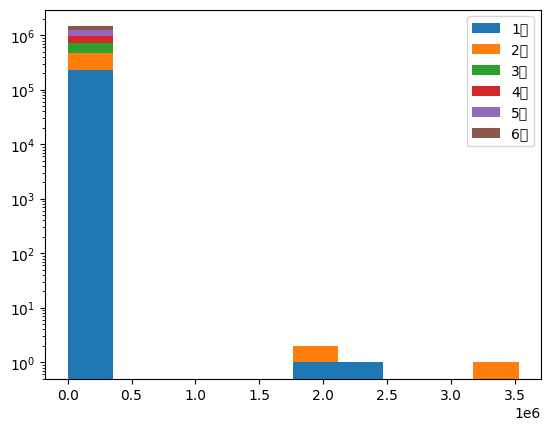

In [ ]:
plt.hist( x= duration_by_month,  histtype = "barstacked", label = ["1월", "2월","3월","4월","5월","6월"]) # 최종 변수가 연속형이므로
plt.legend()
plt.yscale("log")

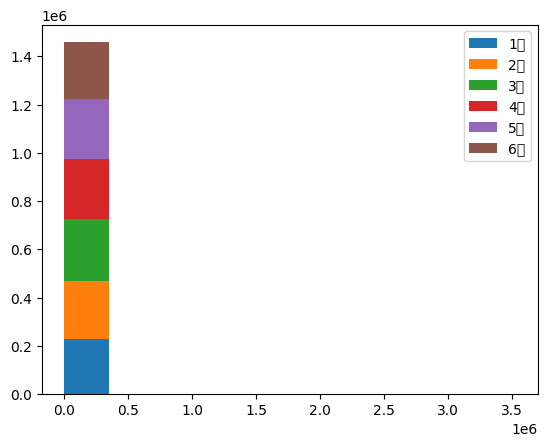

In [ ]:
plt.hist( x= duration_by_month,  histtype = "barstacked", label = ["1월", "2월","3월","4월","5월","6월"]) # 최종 변수가 연속형이므로
plt.legend()

2) 거리

In [ ]:
train['horizon_length'] = abs(train['pickup_longitude'] -train['dropoff_longitude'])

In [ ]:
train['vertical_length'] = abs(train['pickup_latitude'] -train['dropoff_latitude'])

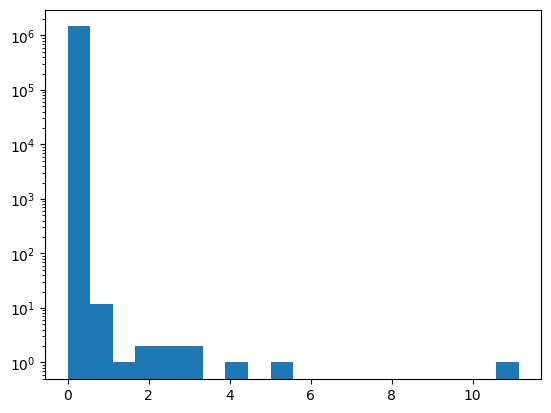

In [ ]:
vma =train['vertical_length'].max()
vmi = train['vertical_length'].min()

plt.hist('vertical_length', data = train, range=(min(0, vmi),vma ), bins = 20) # plt.hist(train['vertical_dist'].value_counts()) 같은 방식
# plt.xlim(0, 1)#plt.xlim(xmin,xmax)
plt.yscale('log')

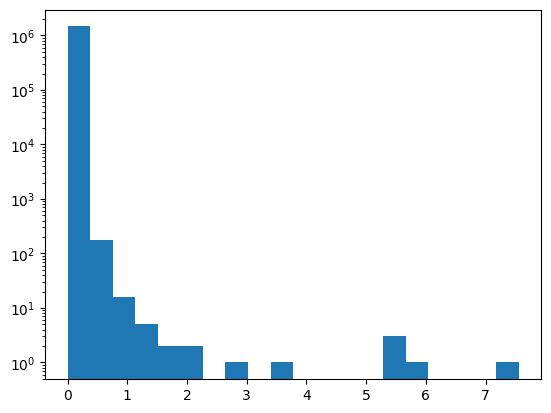

In [ ]:
vma =train['horizon_length'].max()
vmi = train['horizon_length'].min()
plt.hist('horizon_length', data = train, range=(min(0, vmi),vma ), bins=20)
plt.yscale("log")

In [ ]:
train['short_distance'] = (train['vertical_length'] *train["horizon_length"])/2

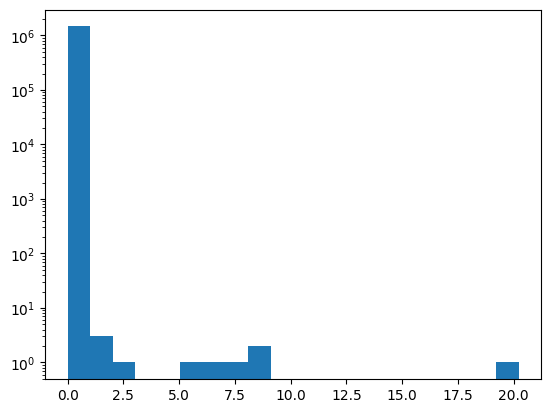

In [ ]:
vma =train['short_distance'].max()
vmi = train['short_distance'].min()
plt.hist('short_distance', data = train, range=(min(0, vmi),vma ), bins=20)
plt.yscale("log")

In [ ]:
duration_by_month[0]

2          2124
5           443
34          707
36          553
46          348
           ... 
1458623     554
1458625    2002
1458626     244
1458640     655
1458642     373
Name: trip_duration, Length: 229707, dtype: int64

In [ ]:
# 생성한 파생변수 후 컬럼 타입 분할

numeric_list = []
temp = pd.Series(train.dtypes)
numeric_list += list(temp[temp=='float64'].index)
numeric_list += list(temp[temp=='int64'].index)
numeric_list

obj_list = train.columns.difference(numeric_list)
obj_list

Index(['dropoff_datetime', 'id', 'pickup_datetime', 'store_and_fwd_flag'], dtype='object')

In [ ]:
pd.get_dummies?

In [ ]:
# 조정
train_dummy = pd.get_dummies(train, columns = ['store_and_fwd_flag'], drop_first=True)

<Axes: >

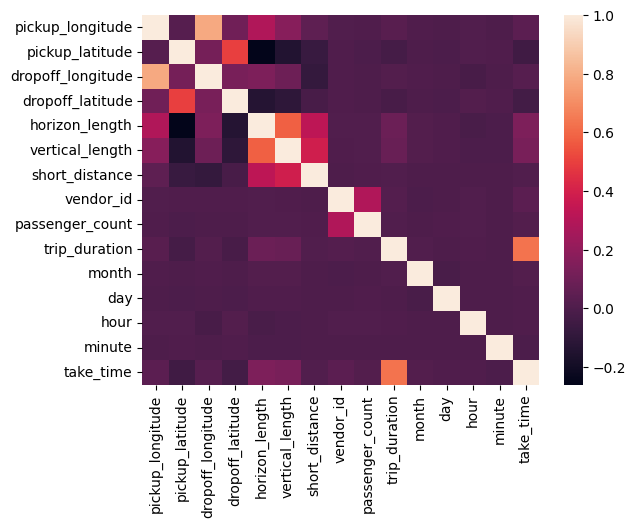

In [ ]:
sns.heatmap(train_dummy[numeric_list].corr())

In [ ]:
# random.seed # random 패키지 seed
# np.random.seed # 넘파이 피키지 seed
# # tf.random.set_seed(seed) # tensorflow global seed # operation seed는 각각 명
#  os.environ["PYTHONHASHSEED"] = str(seed) #tensor, pytorch 모두 해당
# #torch seed 고정
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)  # type: ignore
# torch.backends.cudnn.deterministic = True  # type: ignore
# torch.backends.cudnn.benchmark = True  # type: ignore

## 데이터셋분할 및 스케일러 조정

In [ ]:
from sklearn.model_selection import train_test_split
train_dummy = train_dummy.drop(['dropoff_datetime', 'id', 'pickup_datetime',  'dropoff_latitude', 'dropoff_longitude',  'pickup_latitude', 'pickup_longitude', 'vendor_id'], axis=1 )
x= train_dummy.drop(['trip_duration'], axis=1)
y= train_dummy['trip_duration']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

#희한하네 회귀분석은 왜 values. array를 넣지? => 모델 학습 시, np.array나 dataframe 둘다 들어가는 듯함.  
# from sklearn.model_selection import train_test_split
# # train_dummy = train_dummy.drop(['dropoff_datetime', 'id', 'pickup_datetime',  'dropoff_latitude', 'dropoff_longitude',  'pickup_latitude', 'pickup_longitude', 'vendor_id'], axis=1 )
# x= train_dummy.drop(['trip_duration'], axis=1).values
# y= train_dummy['trip_duration'].values
# x_train, x_test, y_train, t_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
x_train.columns

Index(['passenger_count', 'month', 'day', 'hour', 'minute', 'take_time',
       'horizon_length', 'vertical_length', 'short_distance',
       'store_and_fwd_flag_Y'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler #스케일러 하면 df도 array가 됨
MmScaler = MinMaxScaler()
x_train_scaled = MmScaler.fit_transform(x_train)
x_test_scaled =  MmScaler.transform(x_test) # fit 이 아닌 transform

In [ ]:
x_train_scaled[0]

array([1.11111111e-01, 1.00000000e+00, 9.33333333e-01, 7.82608696e-01,
       3.55932203e-01, 1.31032168e-02, 3.83139440e-03, 1.98849129e-03,
       1.58362235e-05, 0.00000000e+00])

In [ ]:
x_test_scaled[0]

array([1.11111111e-01, 1.00000000e+00, 2.33333333e-01, 3.04347826e-01,
       6.10169492e-01, 1.20267157e-02, 6.99004726e-04, 2.20337996e-03,
       3.20140468e-06, 0.00000000e+00])

In [ ]:
# 데이터 필드
# passenger_count - 차량에 탑승한 승객 수(운전자가 입력한 값)
# pickup_longitude - 미터가 연결된 경도
# pickup_latitude - 미터가 사용된 위도
# dropoff_longitude - 미터가 해제된 경도
# dropoff_latitude - 미터가 해제된 위도
# store_and_fwd_flag - 이 플래그는 차량이 서버에 연결되어 있지 않기 때문에 벤더에게 전송하기 전에 이동 기록이 차량 메모리에 보관되었는지 여부를 나타냅니다. - Y=저장 후 전달; N=매장 아님 앞으로 여행

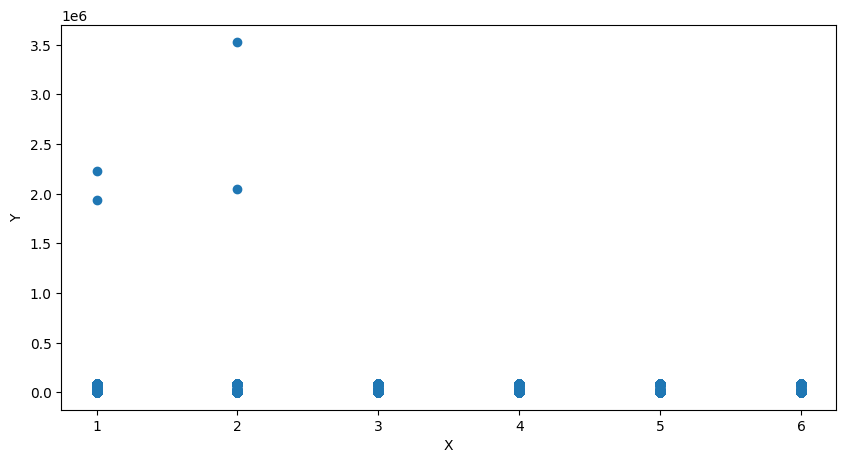

In [ ]:
#단순 회귀가 아니기 때문에 도표로 회귀선을 그릴 수 없음. 그러므로 데이터 값 확인을 위헤 전처리 과정으로 진행
x = x_train['month']
y = y_train

plt.figure(figsize = (10,5))
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

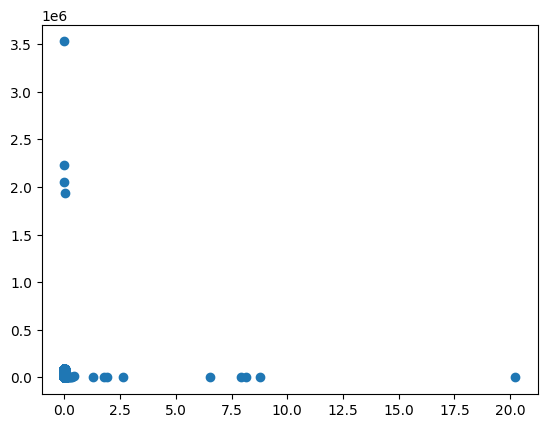

In [ ]:
x = x_train['short_distance']
y = y_train
plt.scatter(x,y)

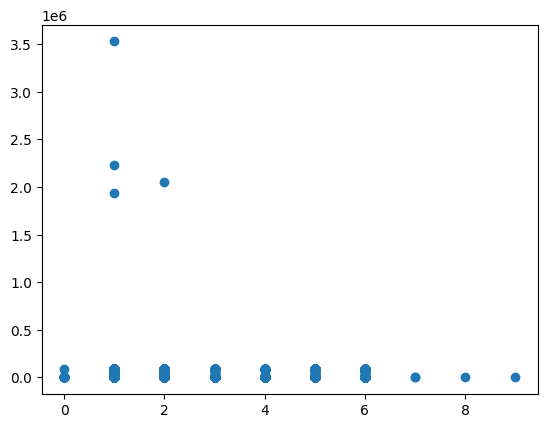

In [ ]:
x = x_train['passenger_count']
y = y_train
plt.scatter(x,y)